In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Exploratory data analysis: 
Term deposit - a deposit with a fixed rate where money can't be accessed for a certain amount of time but then is provided back at a maturity level

In [8]:
# adding the dataset to a pandas dataframe

df = pd.read_csv('~/Documents/Portfolio/data/bank 3.csv')

In [9]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [10]:
# can see from the above that there is a lot of rows so want to see the overall shape
df.shape

(11162, 17)

In [11]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [12]:
# want to see the columns to understand what is being measured/visualised alongside the unique values for each column
# deposit at the end shows if customers subscribed to the term deposit loan or not, outcome referring to if the marketing
# strategies were a success

for col in df.select_dtypes(include='object').columns:
    print(col)
    print(df[col].unique())

job
['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']
marital
['married' 'single' 'divorced']
education
['secondary' 'tertiary' 'primary' 'unknown']
default
['no' 'yes']
housing
['yes' 'no']
loan
['no' 'yes']
contact
['unknown' 'cellular' 'telephone']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome
['unknown' 'other' 'failure' 'success']
deposit
['yes' 'no']


In [13]:
# find missing values

missing_values = df.isnull().sum() # this code here is a pandas series which returns the missing values from each col
print(missing_values)


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64


In [14]:
# checking to see if any of the features have only one value

for column in df.columns:
    print(column, df[column].nunique())

age 76
job 12
marital 3
education 4
default 2
balance 3805
housing 2
loan 2
contact 3
day 31
month 12
duration 1428
campaign 36
pdays 472
previous 34
poutcome 4
deposit 2


In [15]:
# determining which features are categorical as for ML we want features to be numerical

categorical_features = [feature for feature in df.columns if ((df[feature].dtypes == 'O') & (feature not in ['depsoit']))]
print(categorical_features)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'deposit']


Data visualisation of categorical features

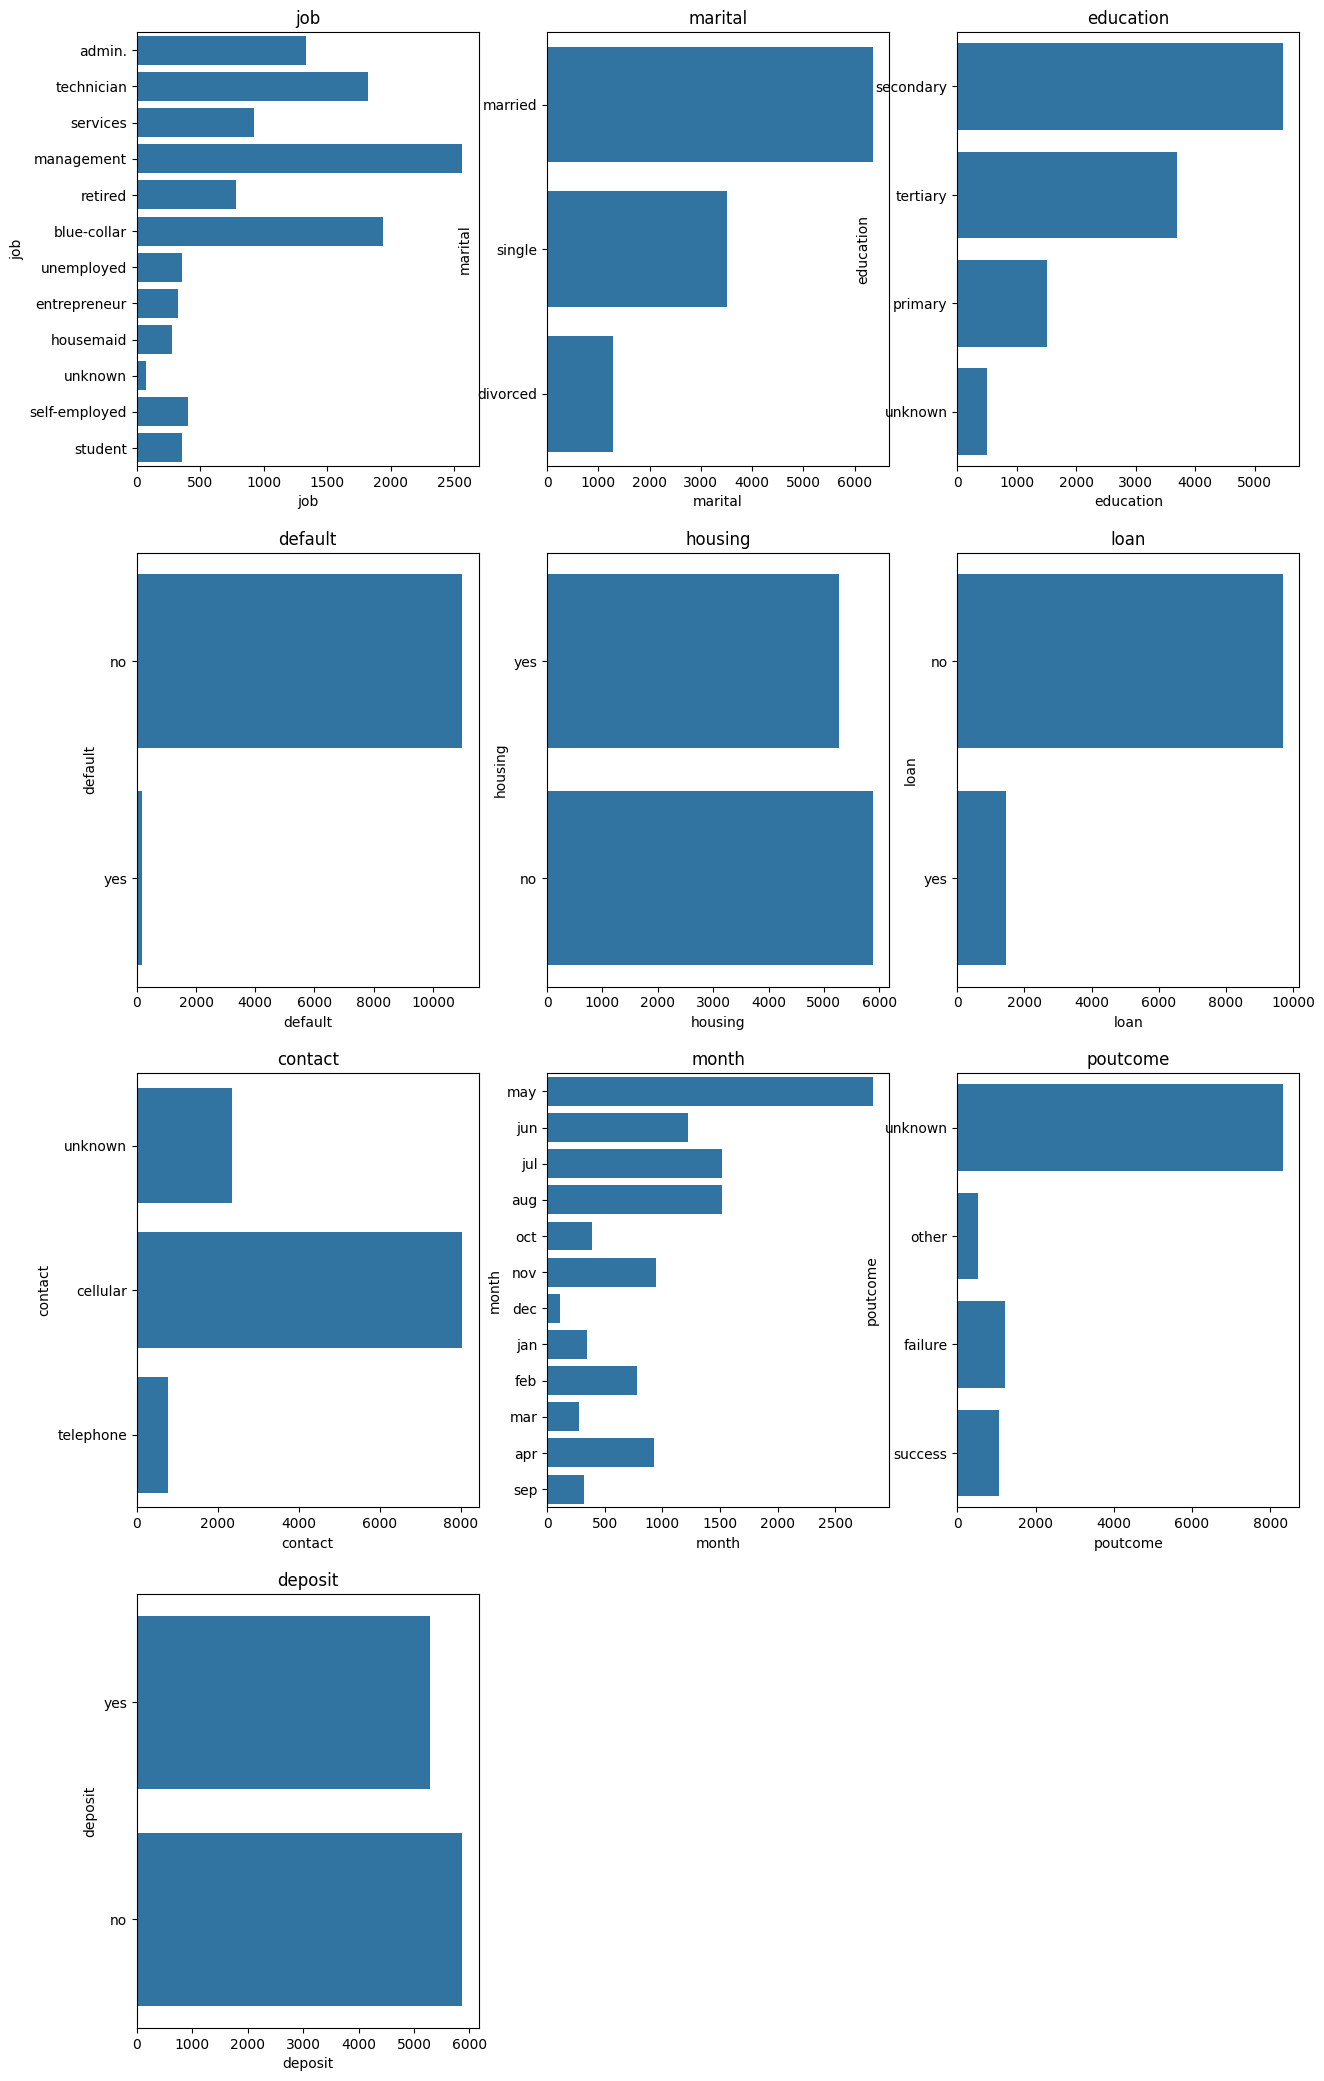

In [16]:
plt.figure(figsize=(15,80))
plotnumber =1
for i in categorical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=i, data=df)
    plt.xlabel(i)
    plt.title(i)
    plotnumber += 1
plt.show()

# results show that most of the people the marketing materials were sent to were people working within management, and that 
# a lot of the people were marriaged and received a secondary education.
# most people have never defaulted and most people were contacted with the marketing material in May and least was December


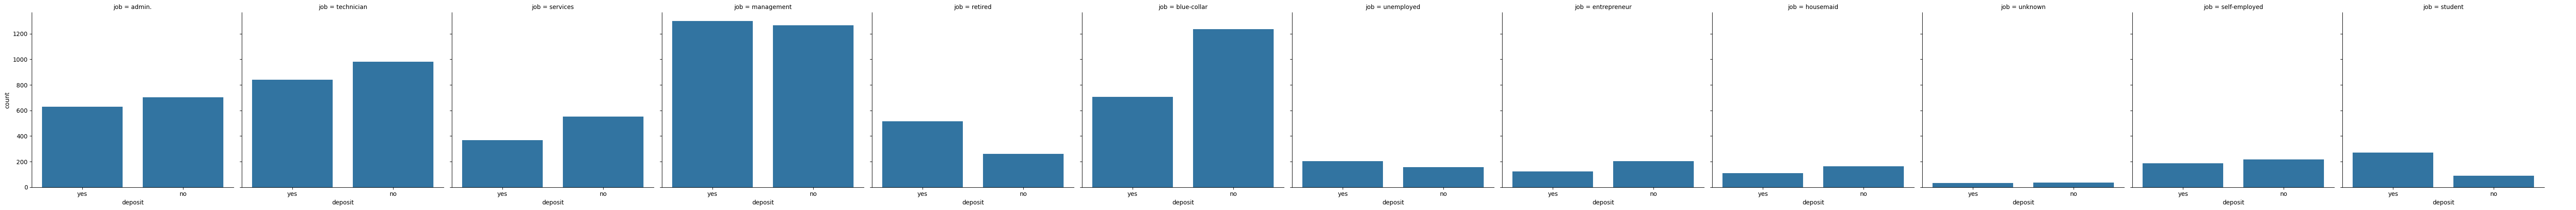

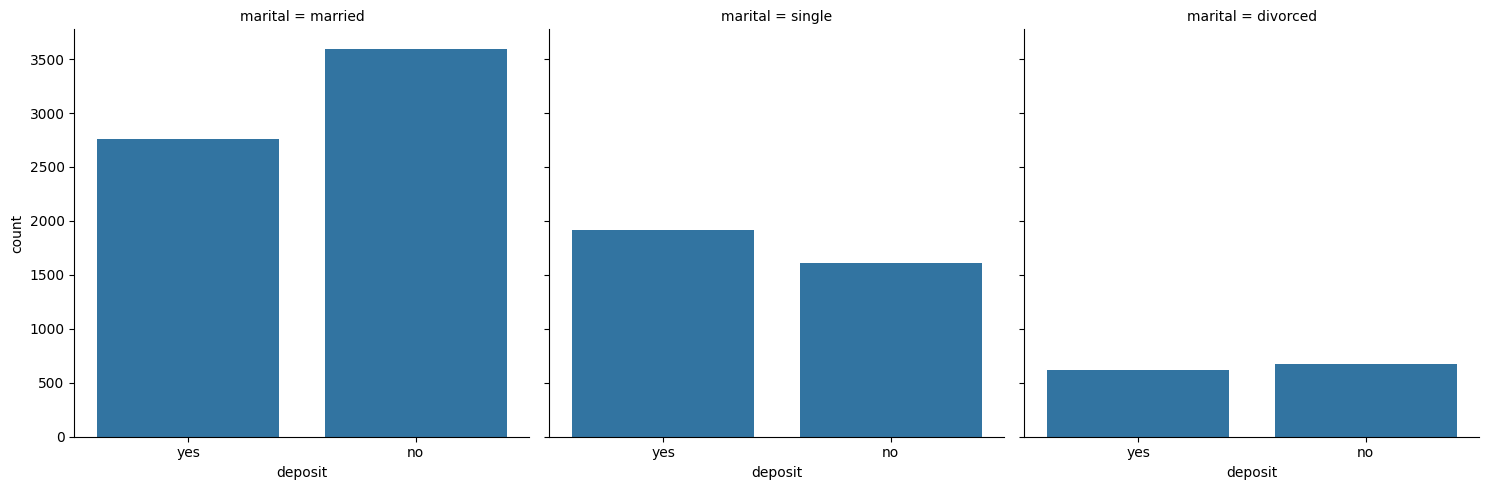

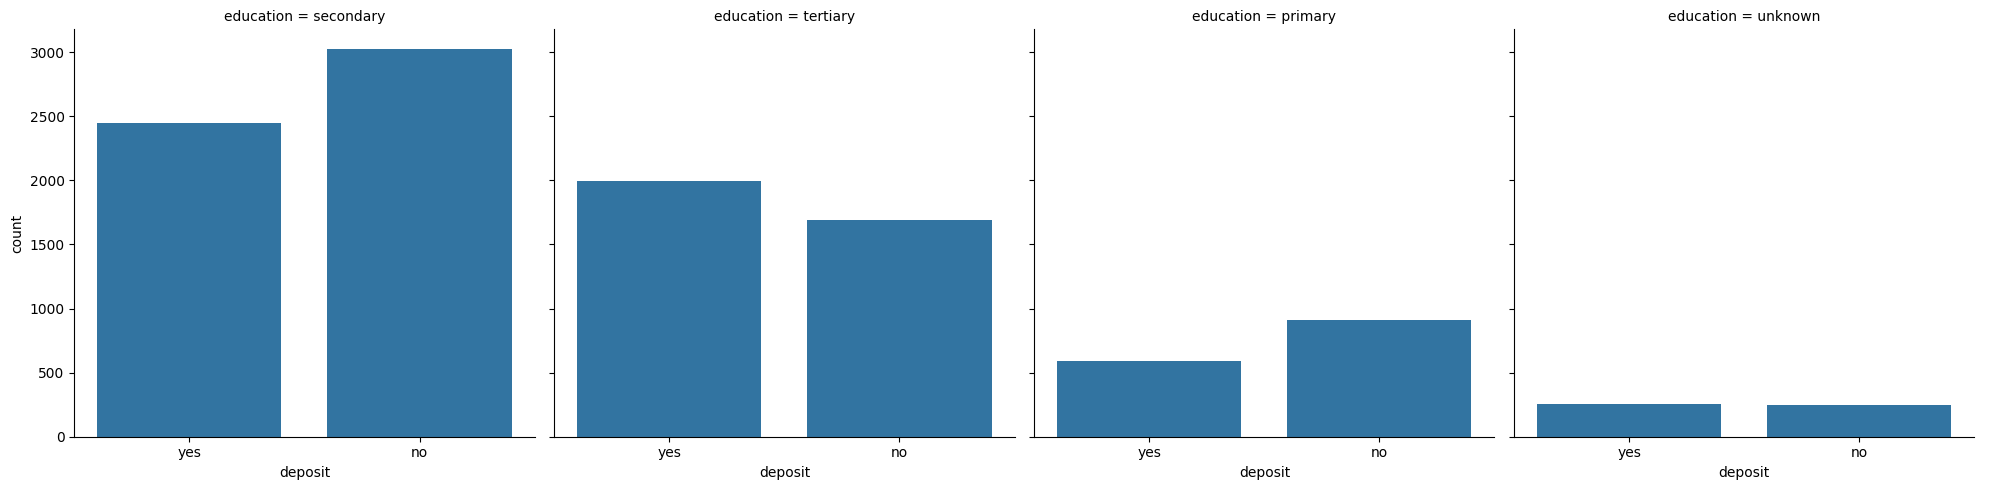

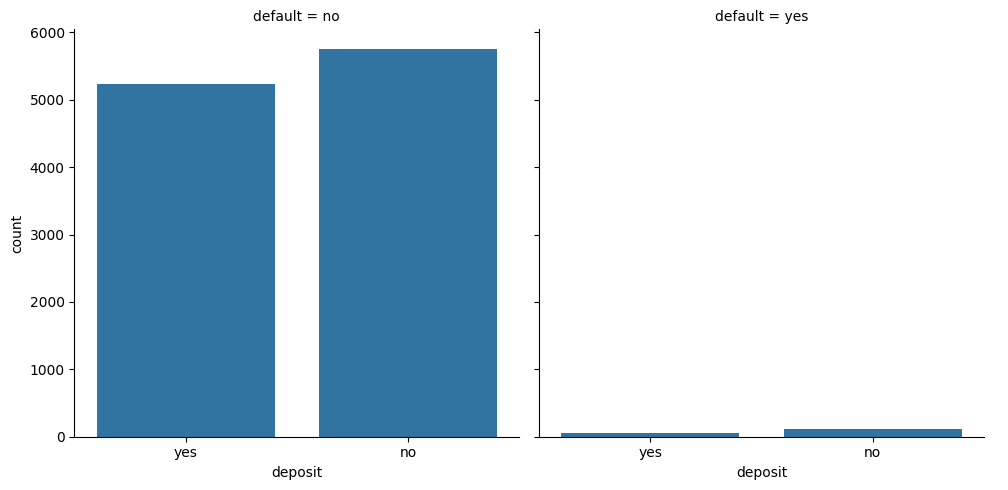

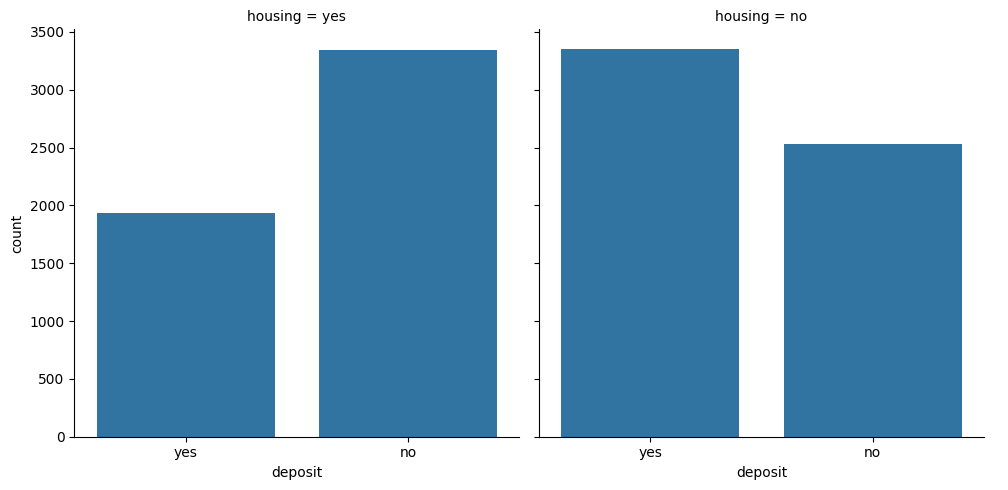

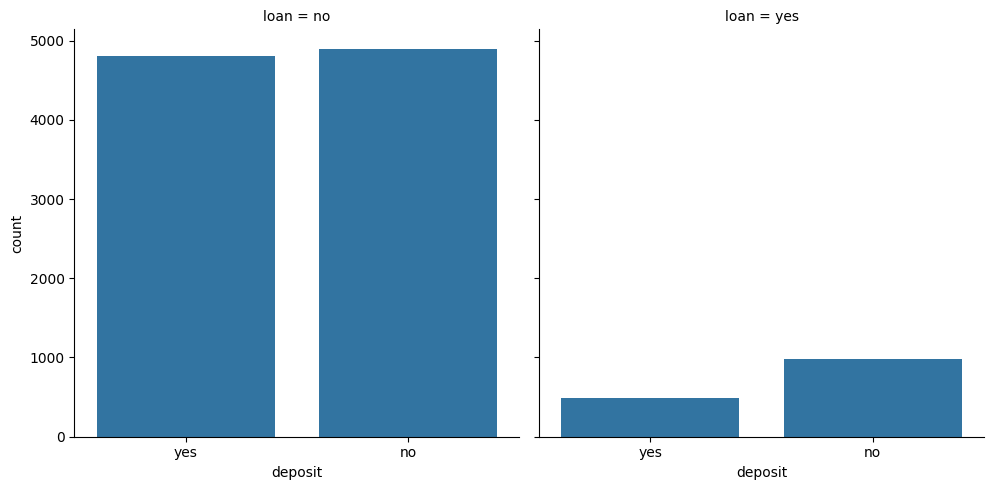

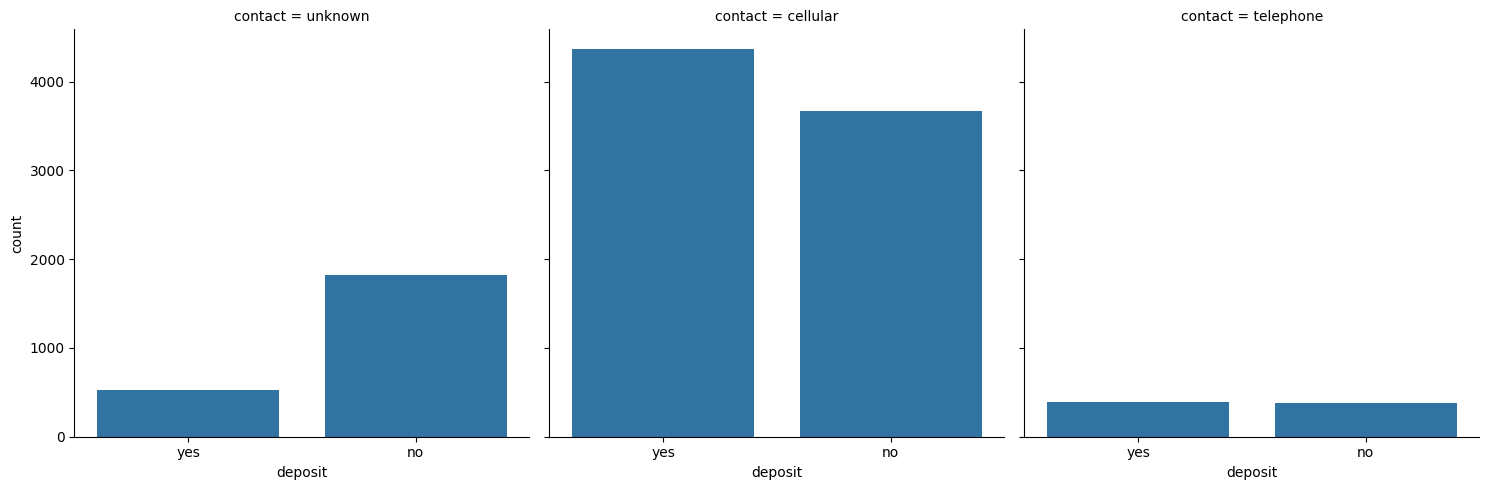

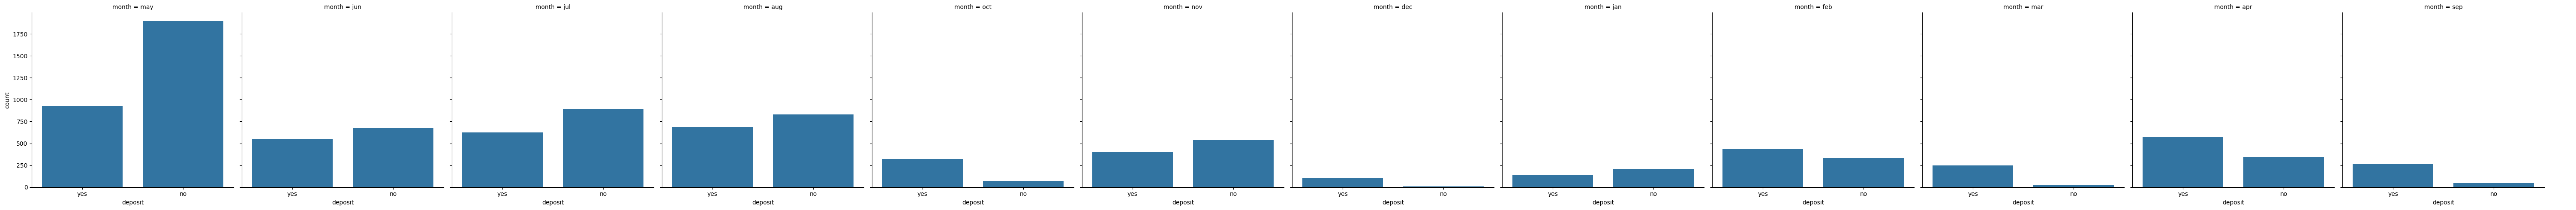

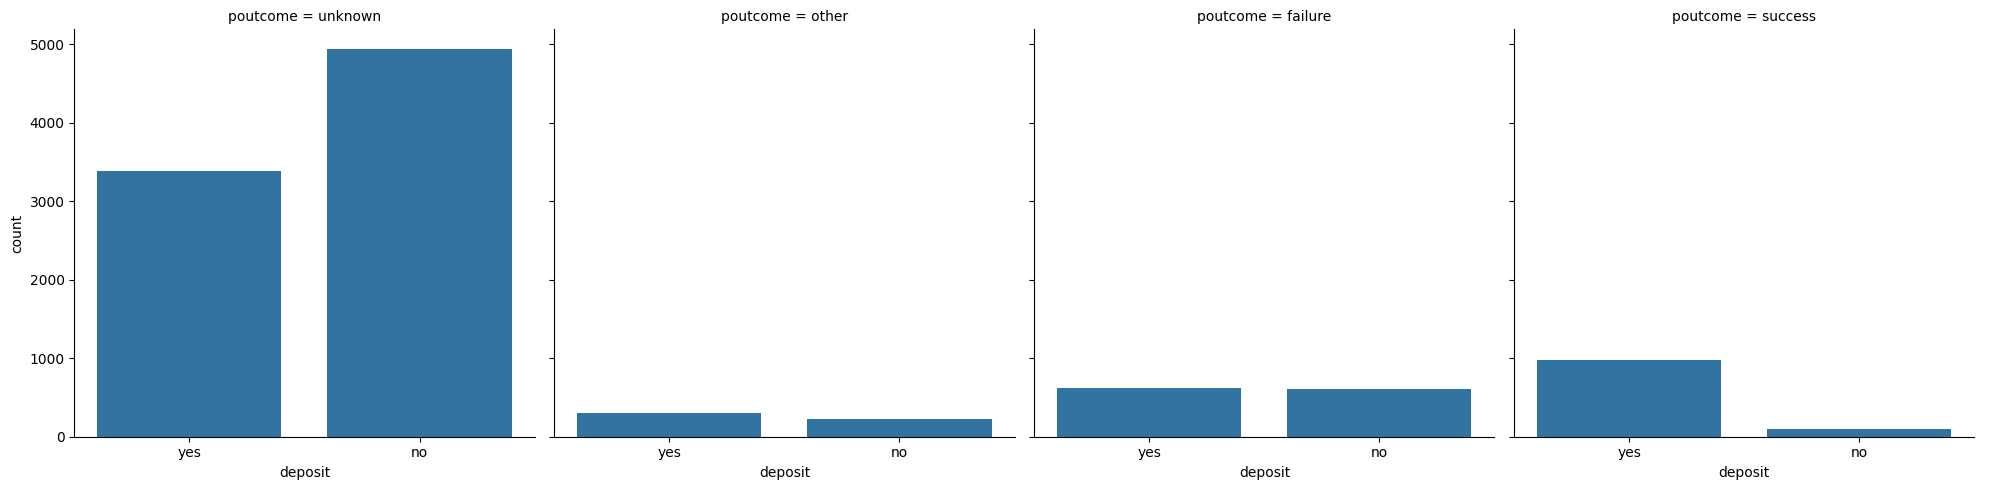

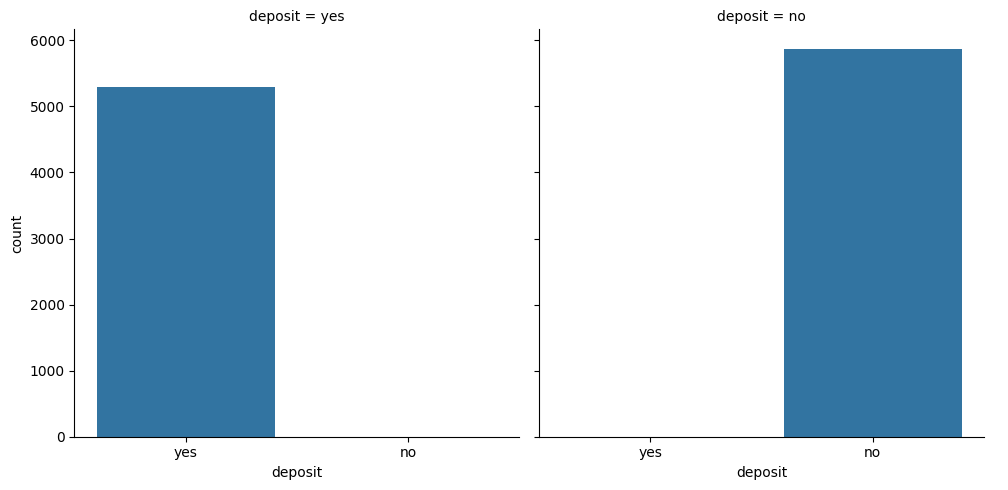

In [17]:
# trying to visualise and explore whether there is an explicit relationship between any of the categorical variables with the
# target output

for i in categorical_features:
    sns.catplot(x='deposit', col=i, kind='count', data=df)
plt.show()

# visual analysis:
# job: retired customers were the most interested on the terms deposit loan
# marital and education: no group show an intense interest in product

In [18]:
# code to see the count of deposits:
for i in categorical_features:
    print(df.groupby(['deposit',i]).size())

deposit  job          
no       admin.            703
         blue-collar      1236
         entrepreneur      205
         housemaid         165
         management       1265
         retired           262
         self-employed     218
         services          554
         student            91
         technician        983
         unemployed        155
         unknown            36
yes      admin.            631
         blue-collar       708
         entrepreneur      123
         housemaid         109
         management       1301
         retired           516
         self-employed     187
         services          369
         student           269
         technician        840
         unemployed        202
         unknown            34
dtype: int64
deposit  marital 
no       divorced     671
         married     3596
         single      1606
yes      divorced     622
         married     2755
         single      1912
dtype: int64
deposit  education
no       prima

In [19]:
# Numerical features

numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']

print(numerical_features)

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


In [20]:
## Discrete numerical features

discrete_features = [feature for feature in numerical_features if len(df[feature].unique())<25]
print('Discrete variable count: {}'.format(len(discrete_features)))

## Continuous numerical features

continuous_features = [feature for feature in numerical_features if (feature not in discrete_features)]
print('Continuous feature count: {}'.format(len(continuous_features)))

Discrete variable count: 0
Continuous feature count: 7


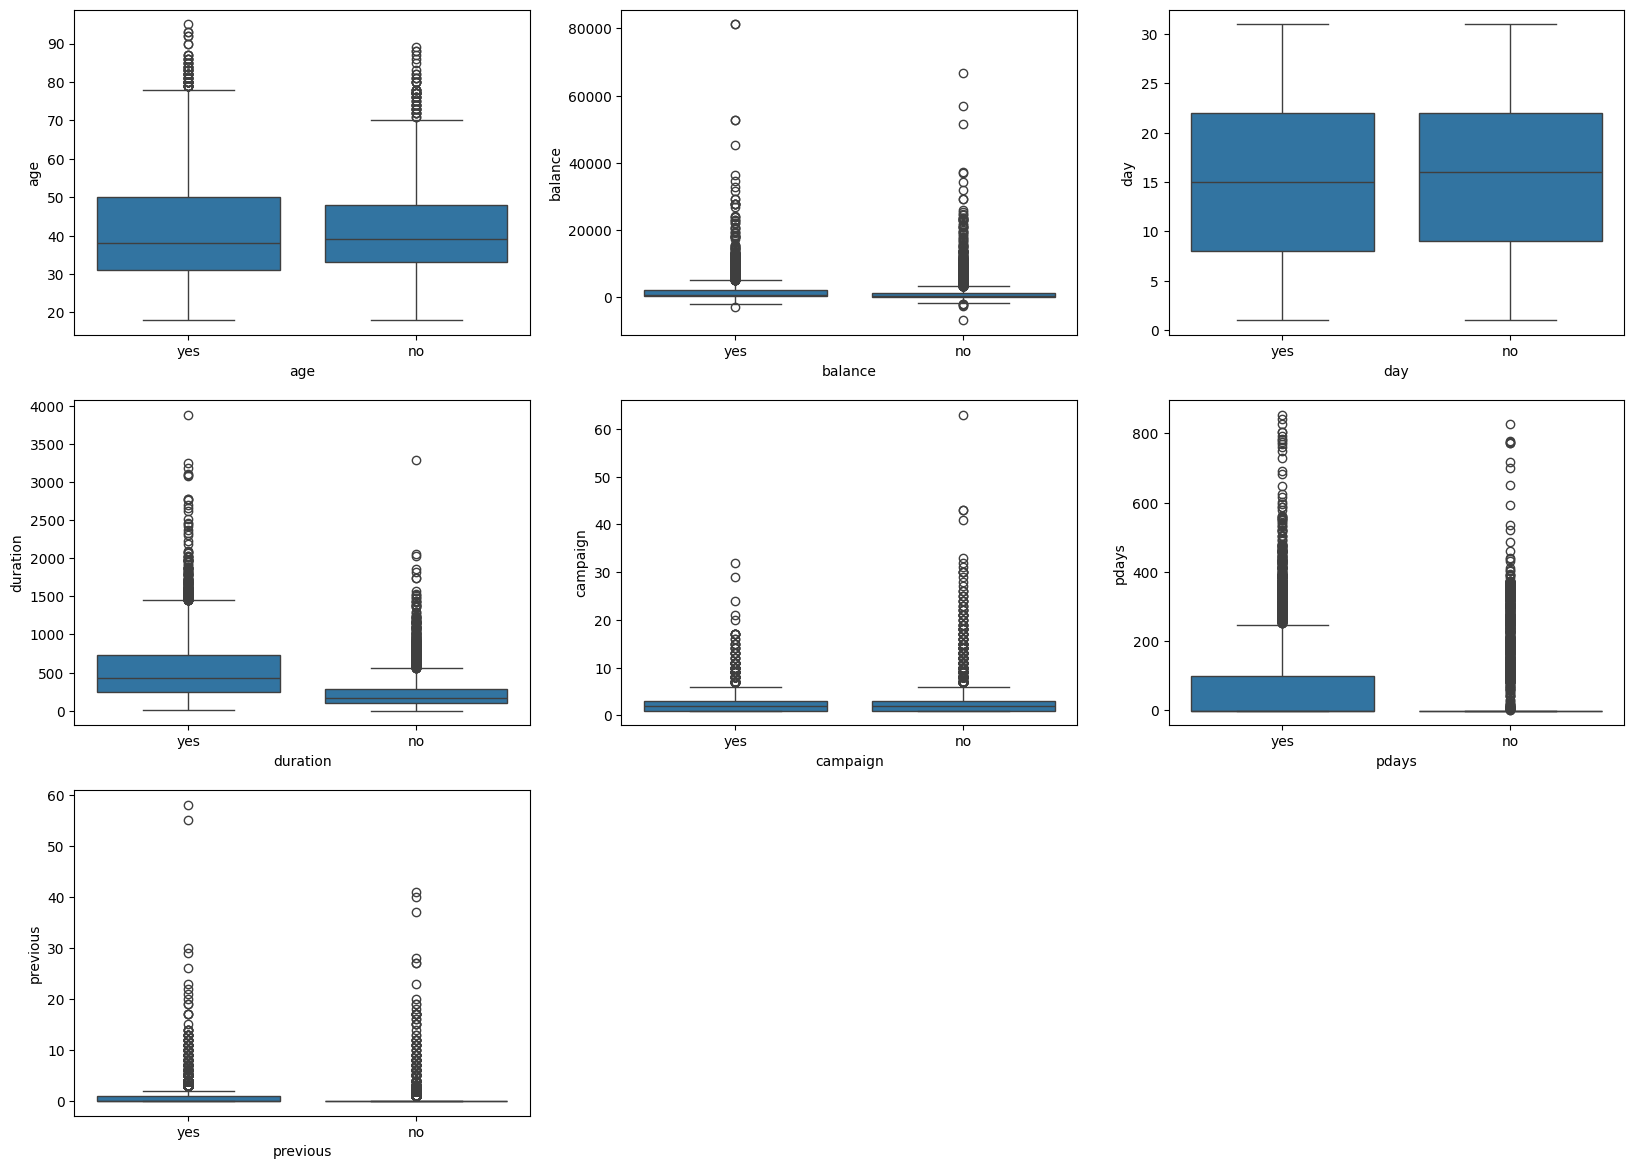

In [21]:
# Exploring the relationship between the continuous numerical features and the target output 

plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1

for feature in continuous_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(x='deposit', y=df[feature], data=df)
    plt.xlabel(feature)
    plotnumber+=1
plt.show()

# results show that people approaching middle aged were the most interest in the loan

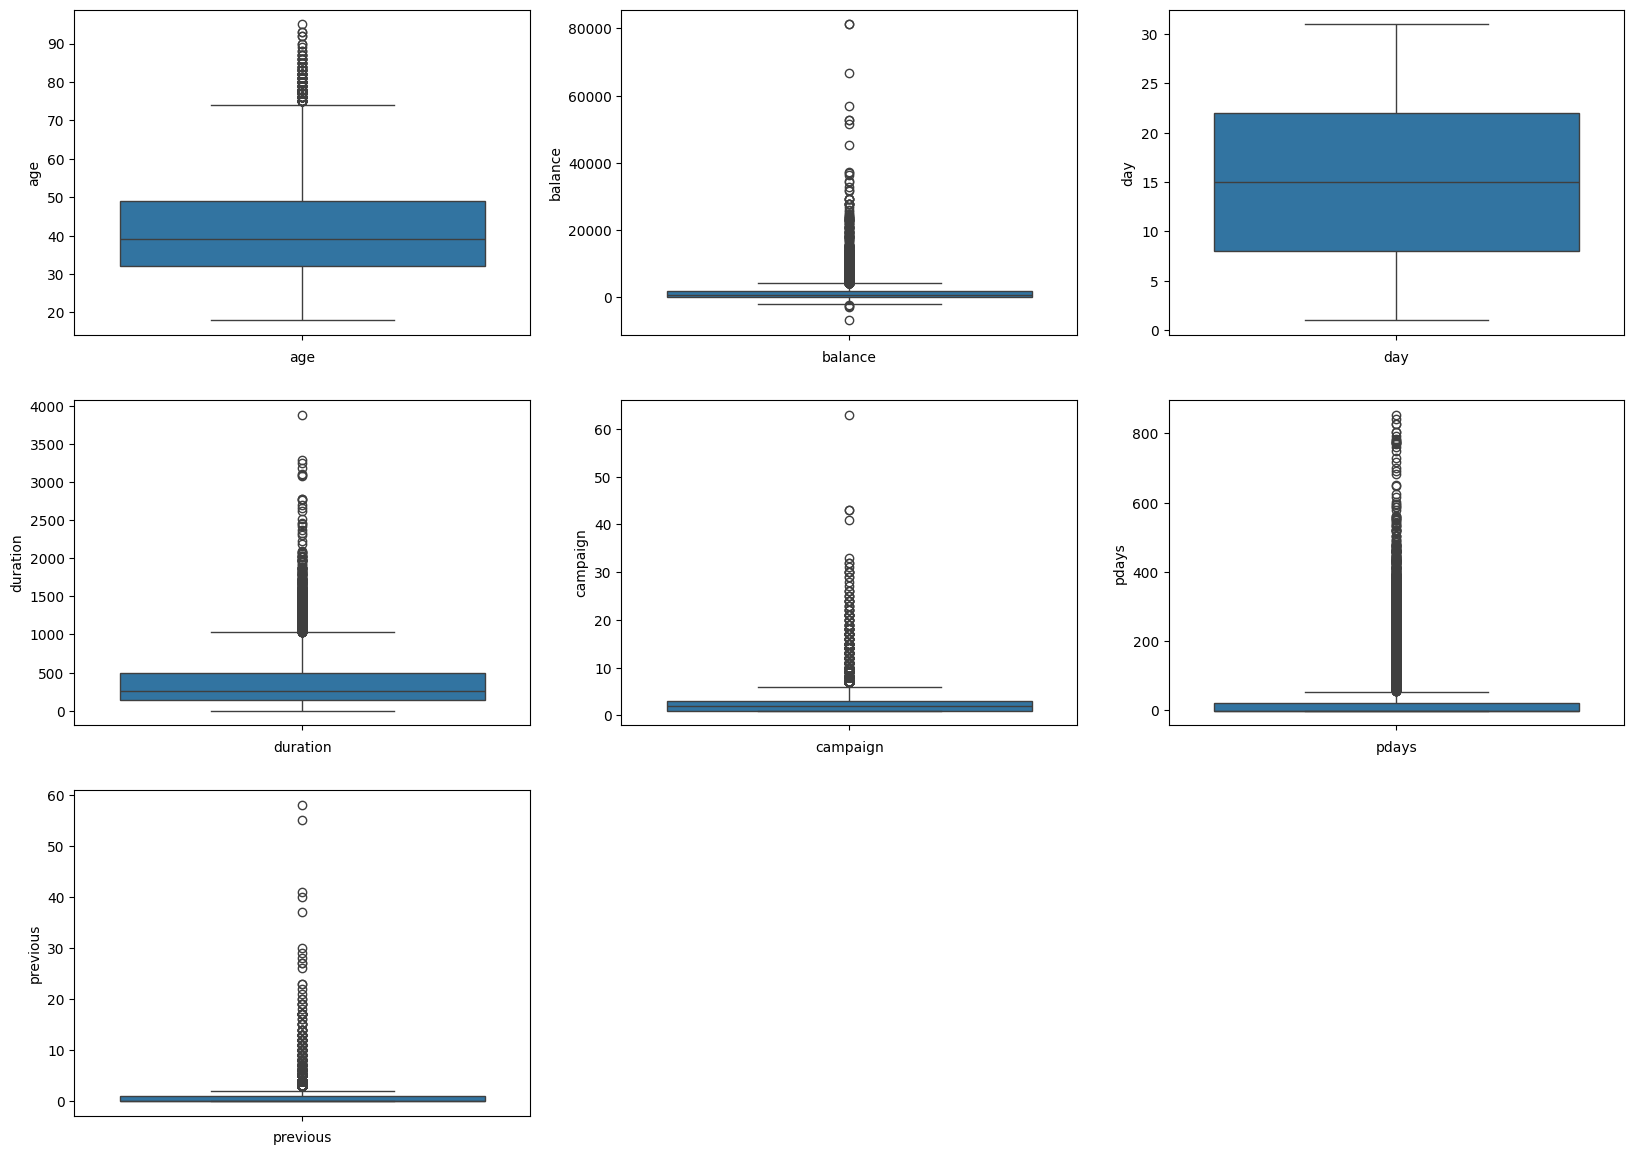

In [22]:
## OUTLIERS via boxlpt on the numerical features

plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for numerical_feature in numerical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(df[numerical_feature])
    plt.xlabel(numerical_feature)
    plotnumber+=1
plt.show()

## results show age, balance, duration, campaign, pdays, previousdays have some outlier


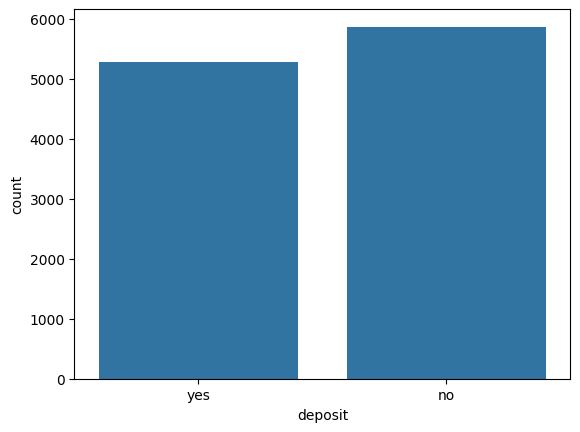

In [23]:
# checking if the data is balanced or unbalanced

sns.countplot(x='deposit', data=df)
plt.show()

Feature Engineering - dropping unwanted features, handling missing values and categorical features

In [24]:
df2 = df.copy()
df2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [25]:
new_df = df.copy()

In [26]:
new_df.groupby(['default', 'deposit']).size()

default  deposit
no       no         5757
         yes        5237
yes      no          116
         yes          52
dtype: int64

In [27]:
new_df.drop(['default'], axis=1, inplace=True)


In [28]:
# pdays has a lot of outliers, so looking at its values we see -1 is the majority value, with the other values having smaller amounts
# so we can remove this

new_df.groupby(['pdays', 'deposit']).size()

pdays  deposit
-1     no         4940
       yes        3384
 1     no            2
       yes           6
 2     no            6
                  ... 
 805   yes           1
 826   no            1
 828   yes           1
 842   yes           1
 854   yes           1
Length: 732, dtype: int64

In [29]:
new_df.drop(['pdays'], axis=1, inplace=True)

In [30]:
new_df

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,deposit
0,59,admin.,married,secondary,2343,yes,no,unknown,5,may,1042,1,0,unknown,yes
1,56,admin.,married,secondary,45,no,no,unknown,5,may,1467,1,0,unknown,yes
2,41,technician,married,secondary,1270,yes,no,unknown,5,may,1389,1,0,unknown,yes
3,55,services,married,secondary,2476,yes,no,unknown,5,may,579,1,0,unknown,yes
4,54,admin.,married,tertiary,184,no,no,unknown,5,may,673,2,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,1,yes,no,cellular,20,apr,257,1,0,unknown,no
11158,39,services,married,secondary,733,no,no,unknown,16,jun,83,4,0,unknown,no
11159,32,technician,single,secondary,29,no,no,cellular,19,aug,156,2,0,unknown,no
11160,43,technician,married,secondary,0,no,yes,cellular,8,may,9,2,5,failure,no


In [31]:
# interested in seeming how age affects the deposit - data shows age has popularity so not removing

new_df.groupby(['age', 'deposit']).size()

age  deposit
18   no          1
     yes         7
19   no          2
     yes        11
20   no          5
                ..
89   no          1
90   yes         2
92   yes         2
93   yes         2
95   yes         1
Length: 144, dtype: int64

In [32]:
# duration
new_df.groupby(['deposit','duration'], sort=True)['duration'].count()
# EDA shows customers with higher durations have more intersted in deposit product - don't remove

deposit  duration
no       2           1
         3           1
         4           2
         5           4
         6           6
                    ..
yes      3094        1
         3102        1
         3183        1
         3253        1
         3881        1
Name: duration, Length: 2157, dtype: int64

In [33]:
# campaigns
new_df.groupby(['deposit','campaign'], sort=True)['campaign'].count()
# here data shows us over 32 days of contact for both yes and no there is no differencem so we drop after 32

deposit  campaign
no       1           2237
         2           1627
         3            703
         4            454
         5            239
         6            173
         7             92
         8             96
         9             51
         10            38
         11            24
         12            25
         13            24
         14            11
         15             9
         16             7
         17             8
         18             8
         19             5
         20             4
         21             7
         22             4
         23             3
         24             4
         25             3
         26             3
         27             1
         28             1
         29             1
         30             4
         31             1
         32             1
         33             1
         41             1
         43             2
         63             1
yes      1           2561
         2          

In [34]:
# Removing outliers

df3 = new_df[new_df['campaign'] < 33]

# so here we have printed it to a new data frame and removed outliers

In [36]:
df4 = df3[df3['previous'] < 31]

In [37]:
df4['housing'].unique()

array(['yes', 'no'], dtype=object)

In [38]:
df4['loan'].unique()

array(['no', 'yes'], dtype=object)

In [39]:
# converting categorical columns into numerical

cat_columns = ['job', 'marital','education', 'contact', 'month', 'poutcome']

for i in cat_columns:
    df4 = pd.concat([df4.drop(i, axis=1),pd.get_dummies(df4[i], prefix=i, prefix_sep='_',drop_first=True, dummy_na=False)], axis=1)

In [40]:
boolean_columns = ['housing', 'loan', 'deposit']
for i in boolean_columns:
    df4[i+'_new'] = df4[i].apply(lambda x : 1 if x == 'yes' else 0)
    df4.drop(i, axis=1, inplace=True)

In [113]:
df4['deposit'] = df['deposit']

In [116]:
df4

,age,balance,day,duration,campaign,previous,deposit_yes,job_blue-collar,job_entrepreneur,job_housemaid,...,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,housing_new,loan_new,deposit
0,59,2343,5,1042,1,0,True,False,False,False,...,True,False,False,False,False,False,True,1,0,yes
1,56,45,5,1467,1,0,True,False,False,False,...,True,False,False,False,False,False,True,0,0,yes
2,41,1270,5,1389,1,0,True,False,False,False,...,True,False,False,False,False,False,True,1,0,yes
3,55,2476,5,579,1,0,True,False,False,False,...,True,False,False,False,False,False,True,1,0,yes
4,54,184,5,673,2,0,True,False,False,False,...,True,False,False,False,False,False,True,0,0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,20,257,1,0,False,True,False,False,...,False,False,False,False,False,False,True,1,0,no
11158,39,733,16,83,4,0,False,False,False,False,...,False,False,False,False,False,False,True,0,0,no
11159,32,29,19,156,2,0,False,False,False,False,...,False,False,False,False,False,False,True,0,0,no
11160,43,0,8,9,2,5,False,False,False,False,...,True,False,False,False,False,False,False,0,1,no


In [117]:
df4['deposit_new'] = df4['deposit'].apply(lambda x : 1 if x == 'yes' else 0)
df4.drop('deposit', axis=1, inplace=True)

In [41]:
df4

,age,balance,day,duration,campaign,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,housing_new,loan_new,deposit_new
0,59,2343,5,1042,1,0,False,False,False,False,...,True,False,False,False,False,False,True,1,0,1
1,56,45,5,1467,1,0,False,False,False,False,...,True,False,False,False,False,False,True,0,0,1
2,41,1270,5,1389,1,0,False,False,False,False,...,True,False,False,False,False,False,True,1,0,1
3,55,2476,5,579,1,0,False,False,False,False,...,True,False,False,False,False,False,True,1,0,1
4,54,184,5,673,2,0,False,False,False,False,...,True,False,False,False,False,False,True,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,20,257,1,0,True,False,False,False,...,False,False,False,False,False,False,True,1,0,0
11158,39,733,16,83,4,0,False,False,False,False,...,False,False,False,False,False,False,True,0,0,0
11159,32,29,19,156,2,0,False,False,False,False,...,False,False,False,False,False,False,True,0,0,0
11160,43,0,8,9,2,5,False,False,False,False,...,True,False,False,False,False,False,False,0,1,0


Splitting the Data

In [42]:
from sklearn.model_selection import train_test_split

X = df4.drop(['deposit_new'],axis=1)
y = df4['deposit_new']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

Model Selection

In [43]:
# using RandomForestClassifier and XGBClassifier to see which model gives the best score
# assessing RFC first, slicing the data into 5 segments and seeing the scores

from sklearn.model_selection import cross_val_score

rcf_scores = cross_val_score(estimator=RandomForestClassifier(),X=X_train, y=y_train, cv=5)
print(f"Random Forest Classifier CV scores: {rcf_scores}")
print(f"Random Forest Classifier Mean CV score: {rcf_scores.mean()}")

xgb_scores = cross_val_score(estimator=XGBClassifier(),X=X_train, y=y_train, cv=5)
print(f"XGBoost Classifier CV scores: {xgb_scores}")
print(f"XGBoost Classifier Mean CV score: {xgb_scores.mean()}")


Random Forest Classifier CV scores: [0.85322129 0.84809417 0.84136771 0.85313901 0.8559417 ]
Random Forest Classifier Mean CV score: 0.8503527778824533
XGBoost Classifier CV scores: [0.85658263 0.85762332 0.85313901 0.85650224 0.86154709]
XGBoost Classifier Mean CV score: 0.8570788584492093


In [45]:
# hypertuning RFC modeL

rfc_param_grid = {
        'n_estimators': [50, 100, 200], # number of tree levels (sklearn documentation for this)
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'max_features': ['auto', 'sqrt', 'log2']
    }

rfc_grid_search = GridSearchCV(estimator=RandomForestClassifier(),param_grid=rfc_param_grid,cv=5,scoring='accuracy')
rfc_grid_search.fit(X_train, y_train)

print("Best RandomForest Parameters:", rfc_grid_search.best_params_)
print("Best RandomForest CV Score:", rfc_grid_search.best_score_)


/Users/anshulsharma/Documents/Portfolio/venv/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
180 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/anshulsharma/Documents/Portfolio/venv/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/anshulsharma/Documents/Portfolio/venv/lib/python3.13/site-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File 

Best RandomForest Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 200}
Best RandomForest CV Score: 0.8550612352564345


In [134]:
#gridsearch
scores =[]
for model_name, mp in model_param.items():
    model_selection = GridSearchCV(estimator=mp['model'],param_grid=mp['param'],cv=5,return_train_score=False)
    model_selection.fit(X,y)
    scores.append({
        'model': model_name,
        'best_score': model_selection.best_score_,
        'best_params': model_selection.best_params_
    })


/Users/anshulsharma/Documents/Portfolio/venv/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
80 fits failed out of a total of 160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/anshulsharma/Documents/Portfolio/venv/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/anshulsharma/Documents/Portfolio/venv/lib/python3.13/site-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "/

In [139]:
print(model_selection.best_score_)

0.9983862130235792


In [140]:
print(model_selection.best_params_)

{'criterion': 'entropy', 'max_depth': 3, 'max_features': 'log2', 'n_estimators': 130}


In [141]:
y_pred = model_selection.best_estimator_.predict(X_test)
print("\nTest set accuracy:", accuracy_score(y_test, y_pred))
print("Classification report:\n", classification_report(y_test, y_pred))


Test set accuracy: 0.994621246077992
Classification report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      1179
           1       0.99      1.00      0.99      1052

    accuracy                           0.99      2231
   macro avg       0.99      0.99      0.99      2231
weighted avg       0.99      0.99      0.99      2231



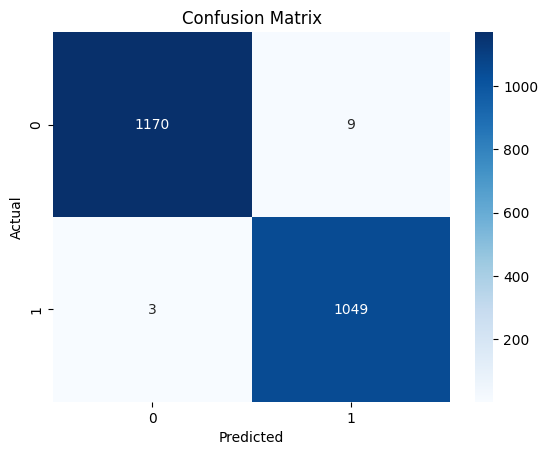

In [142]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()